In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/suriya/milestones/pm-pyro


## Simulate 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

## Plot Data

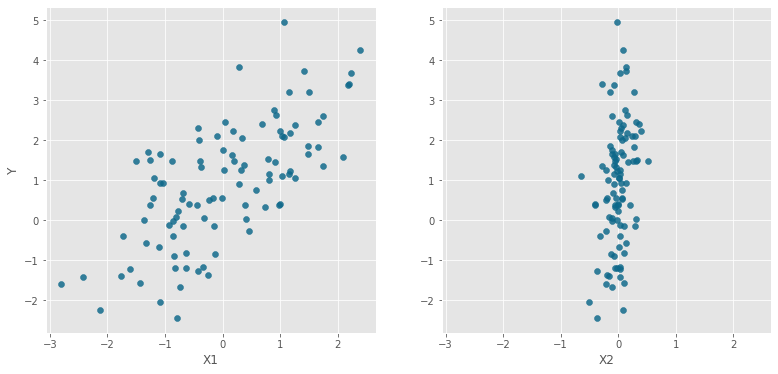

In [4]:
import matplotlib as mpl
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(13, 6))
axes[0].scatter(X1, Y, c= '#0e688a', alpha=0.83)
axes[1].scatter(X2, Y, c= '#0e688a', alpha=0.83)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

## Stochastic Function

$$\alpha \sim \mathcal{N}(0, 10)$$
$$\beta \sim \mathcal{N}([0, 0], [10., 10.])$$
$$\sigma \sim HalfNormal(1.)$$
$$\mu = \alpha + \beta_0 x_0 + \beta_1 x_1$$
$$y \sim \mathcal{N}(\mu, \sigma)$$

In [5]:
import pyro.distributions as pdist
import pyro
import torch

def pyro_model(x1, x2, y):
    alpha = pyro.sample('alpha', pdist.Normal(0, 10))
    beta = pyro.sample('beta', pdist.Normal(torch.zeros(2,), torch.ones(2,) * 10.))
    sigma = pyro.sample('sigma', pdist.HalfNormal(1.))

    # Expected value of outcome
    mu = alpha + beta[0] * x1 + beta[1] * x2

    # Likelihood (sampling distribution) of observations
    return pyro.sample('y_obs', pdist.Normal(mu, sigma), obs=y)

## Context Manager Syntax

In [6]:
from pmpyro import pm_like
import pmpyro as pm

with pm_like(pyro_model, X1, X2, Y) as model:
    trace = pm.sample(1000)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
sample: 100%|██████████| 1300/1300 [00:16, 78.08it/s, step size=6.63e-01, acc. prob=0.914]


## Trace Plot

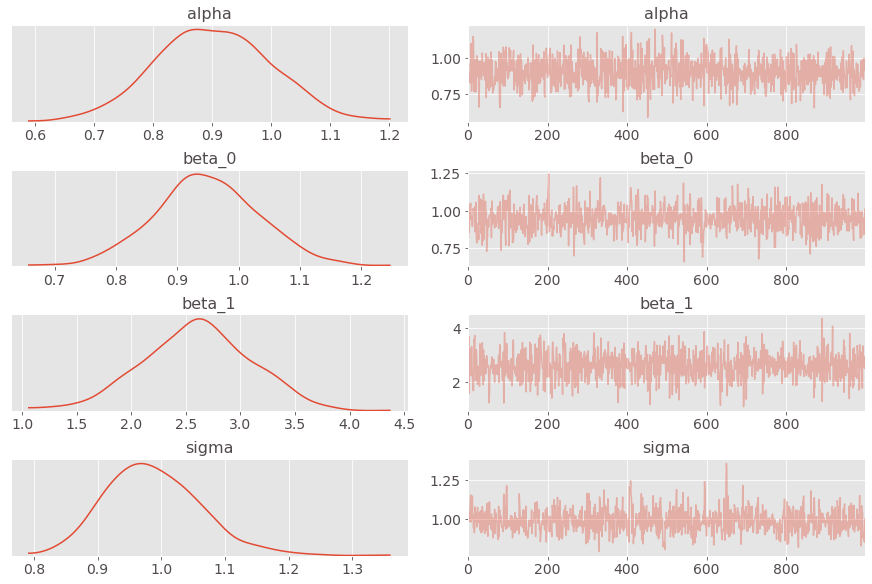

In [7]:
pm.traceplot(trace)

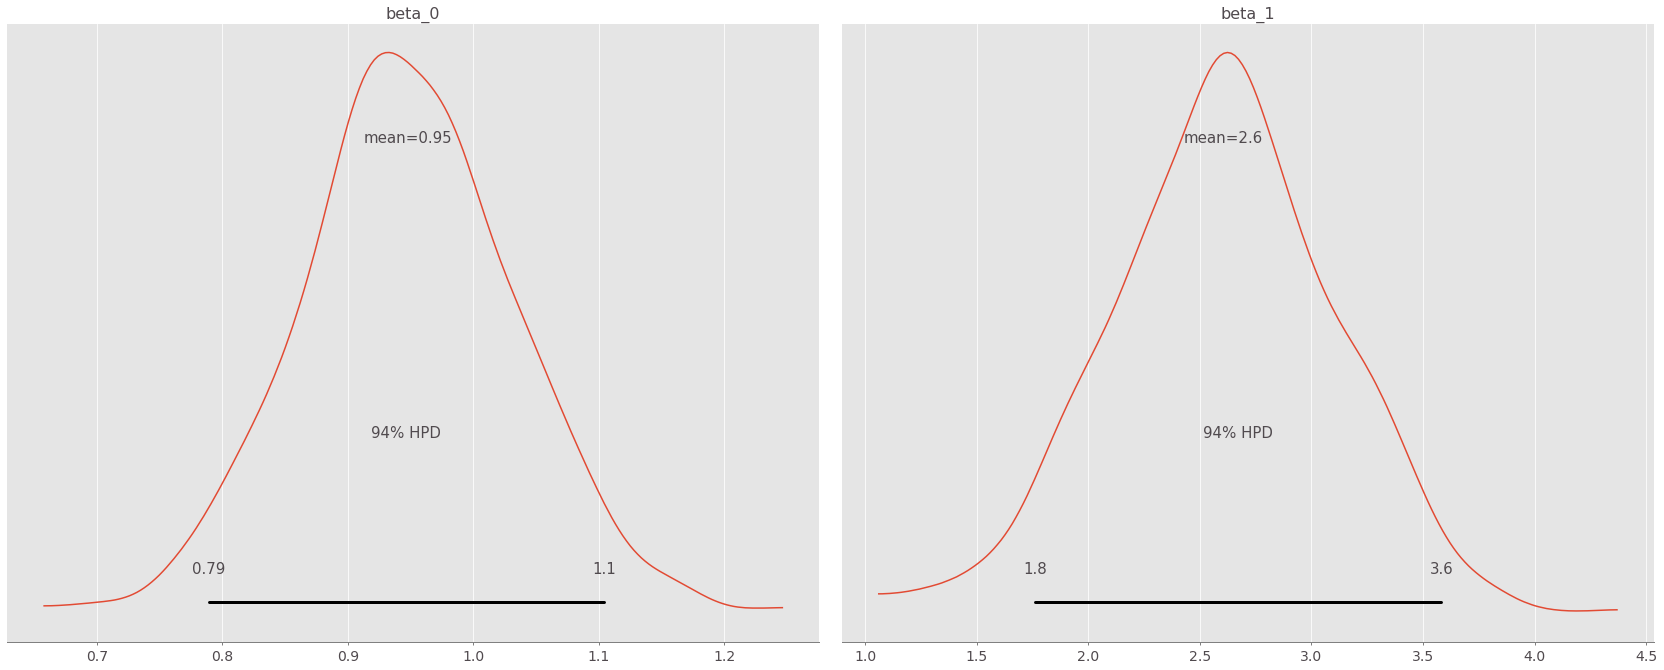

In [8]:
pm.plot_posterior(trace, var_names=['beta'])font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)
FCOLOR = '#504a4e'
mpl.rcParams['text.color'] = FCOLOR
mpl.rcParams['axes.labelcolor'] = FCOLOR
mpl.rcParams['xtick.color'] = FCOLOR
mpl.rcParams['ytick.color'] = FCOLOR


## Posterior Predictive Samples

/usr/local/lib/python3.7/dist-packages/pyro/infer/mcmc/util.py:540: ExperimentalWarning: This function or its interface might change in the future.
  ExperimentalWarning)


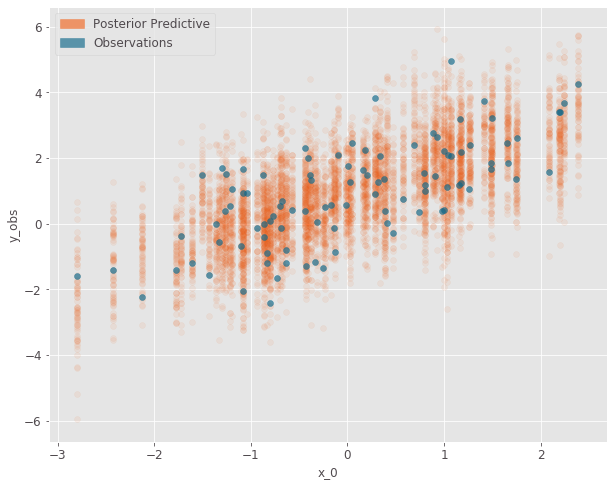

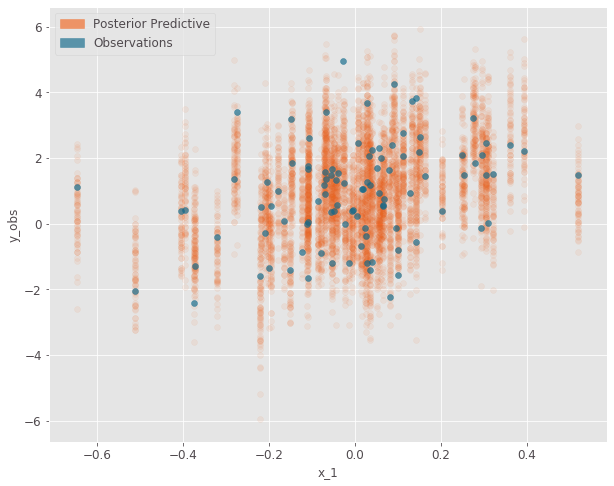

<Figure size 720x576 with 0 Axes>

In [9]:
ppc = pm.plot_posterior_predictive(X1, X2, None,
                          trace=trace, model=model, samples=70,
                          alpha=0.08, obs={'y_obs' : Y})

## Summary

In [10]:
pm.summary(trace)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.902,0.097,0.713,1.073,0.003,0.002,1150.0,1113.0,1156.0,784.0,NaN
beta_0,0.948,0.085,0.789,1.104,0.003,0.002,828.0,828.0,836.0,696.0,NaN
beta_1,2.603,0.499,1.761,3.582,0.015,0.010,1180.0,1157.0,1174.0,831.0,NaN
sigma,0.988,0.075,0.838,1.113,0.003,0.002,681.0,663.0,713.0,551.0,NaN
